In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from itertools import cycle
from tensorflow import keras
#from dt import DecisionTreeClassifier

In [6]:
def eda_bivariate_categorical(df,column,target):

    fig,ax = plt.subplots(figsize = (9,8))

    color = 'Set2'

    palette_color = sns.color_palette(color)

    ax = sns.countplot(x = column, data=df, hue=target,palette=color,order = df[column].value_counts().index)
    ax.set_ylabel('Count')

    offset = df[column].value_counts().max() * 0.005

    list_bars = df.groupby([column,target])[column].agg(['count']).unstack().fillna(0).values

    patches = ax.patches
    bars_pos = 0

    for i in range(df[target].nunique()):
        for j in range(df[column].nunique()):
            list_bars_col = list_bars[j] 
            total_sum = list_bars_col.sum()
            value = list_bars_col[i]

            percentage = value / total_sum

            if percentage == 0:
                bars_pos += 1
                continue
            else:
                x = patches[bars_pos].get_x() + patches[j].get_width()/2
                y = patches[bars_pos].get_height() + offset
                ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
                bars_pos += 1
    plt.show()



In [7]:
data = pd.read_csv('CVD_cleaned.csv')

In [8]:
display(data)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [9]:
data.shape

(308854, 19)

In [10]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [12]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [13]:
display(data[data.duplicated()])
print("Number of duplicated values: ")
display(data.duplicated().sum())

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
46402,Good,Within the past year,Yes,No,No,No,Yes,No,No,Female,18-24,163.0,81.65,30.90,No,0.0,60.0,4.0,4.0
49287,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,160.0,72.57,28.34,Yes,0.0,60.0,30.0,4.0
75448,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,163.0,61.23,23.17,Yes,0.0,30.0,16.0,0.0
76857,Excellent,Within the past year,Yes,No,No,No,No,No,No,Male,40-44,173.0,81.65,27.37,No,0.0,30.0,8.0,1.0
78871,Good,Within the past year,Yes,No,No,No,No,No,No,Female,75-79,163.0,58.97,22.31,No,0.0,60.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301474,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,70-74,173.0,77.11,25.85,No,0.0,30.0,30.0,0.0
303040,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,55-59,168.0,74.84,26.63,No,0.0,30.0,30.0,4.0
303600,Good,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,157.0,72.57,29.26,No,0.0,4.0,12.0,4.0
303609,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,70-74,160.0,58.97,23.03,No,0.0,30.0,4.0,4.0


Number of duplicated values: 


80

In [14]:
target = 'Heart_Disease'

In [15]:
numerical = data.select_dtypes(include=['float64']).columns.sort_values()
categorical = data.select_dtypes(include=['object']).columns.sort_values()

print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 12 Categorical variables
There are 7 Numerical variables


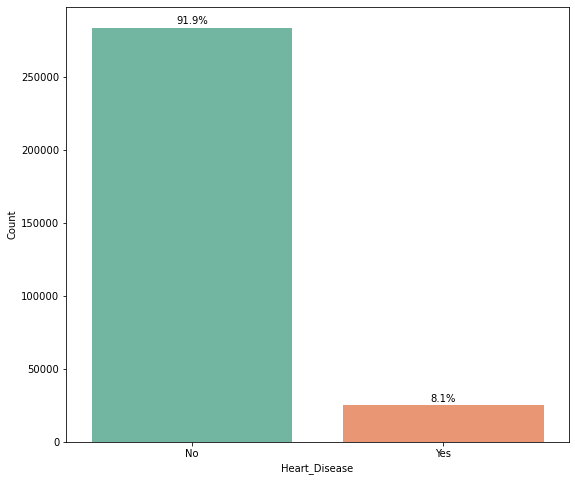

In [16]:
fig,ax = plt.subplots(figsize = (9,8))
color = 'Set2'
palette_color = sns.color_palette(color)

ax = sns.countplot(x = target, 
                data=data,
                palette=color,
                order = data[target].value_counts().index
                )
ax.set_ylabel('Count')

patches = ax.patches

for j in range(len(patches)):
        percentage = list(data[target].value_counts())[j]/data[target].value_counts().sum()
        offset = data[target].value_counts().max() * 0.01
        x = patches[j].get_x() + patches[j].get_width()/2
        y = patches[j].get_height() + offset
        ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')

plt.show()

Age_Category vs. Heart_Disease


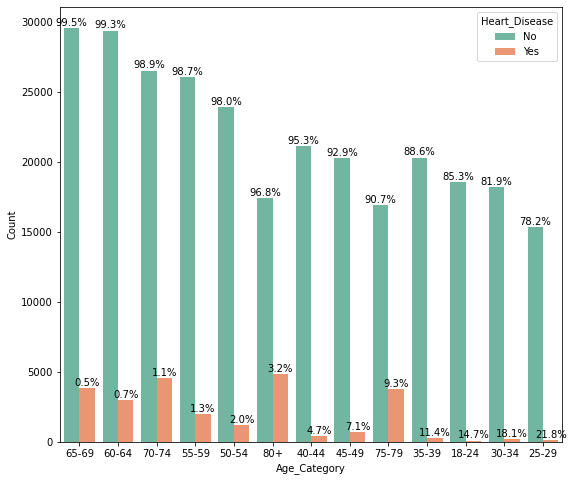

Arthritis vs. Heart_Disease


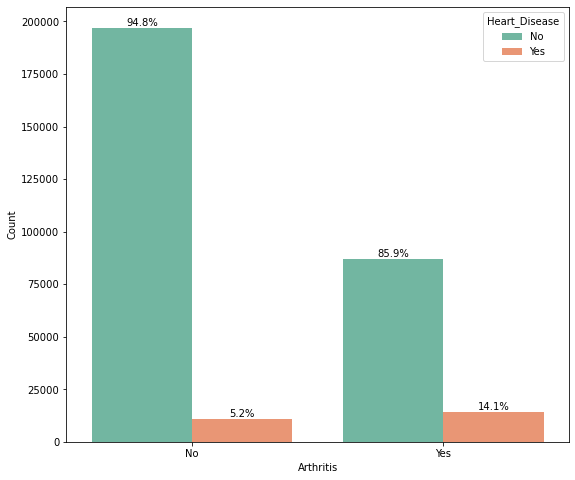

Checkup vs. Heart_Disease


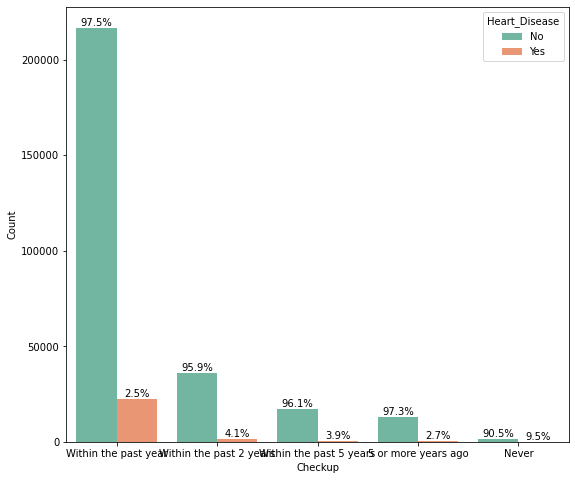

Depression vs. Heart_Disease


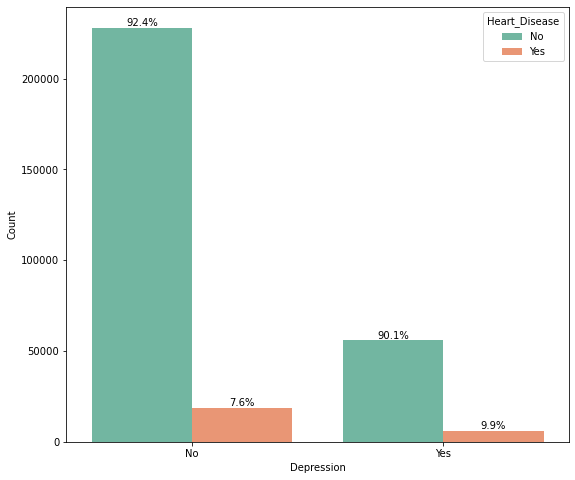

Diabetes vs. Heart_Disease


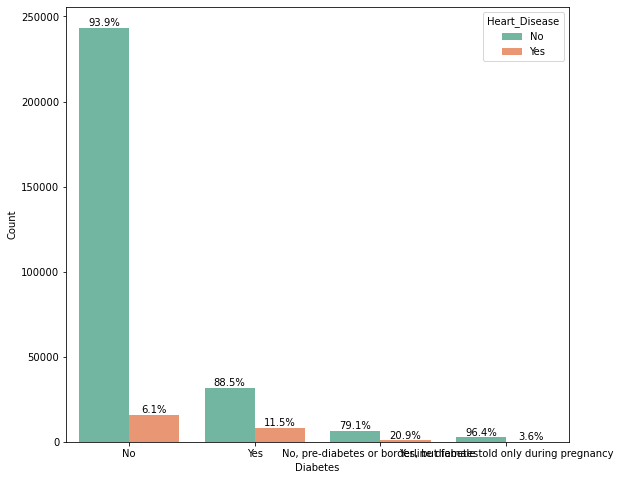

Exercise vs. Heart_Disease


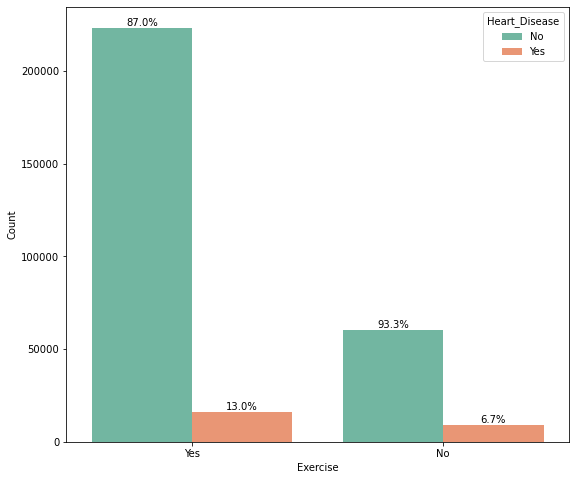

General_Health vs. Heart_Disease


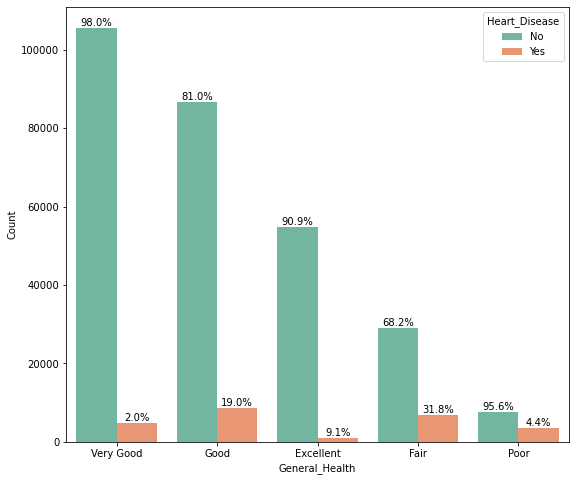

Other_Cancer vs. Heart_Disease


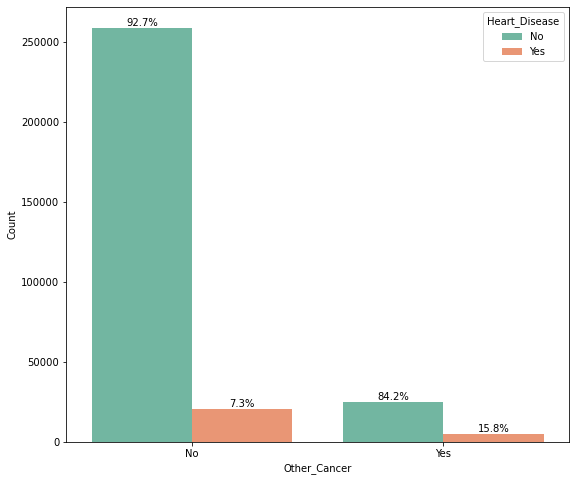

Sex vs. Heart_Disease


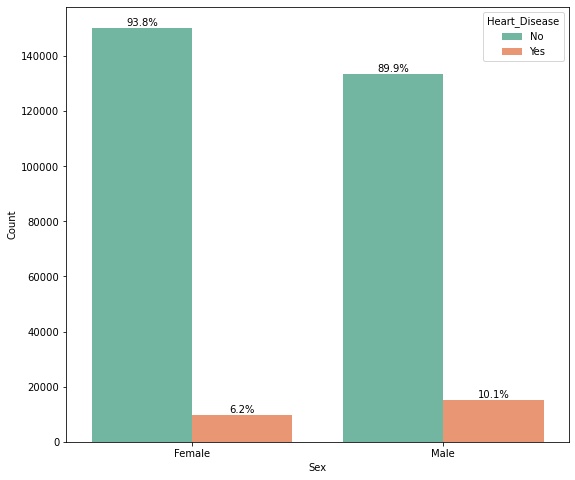

Skin_Cancer vs. Heart_Disease


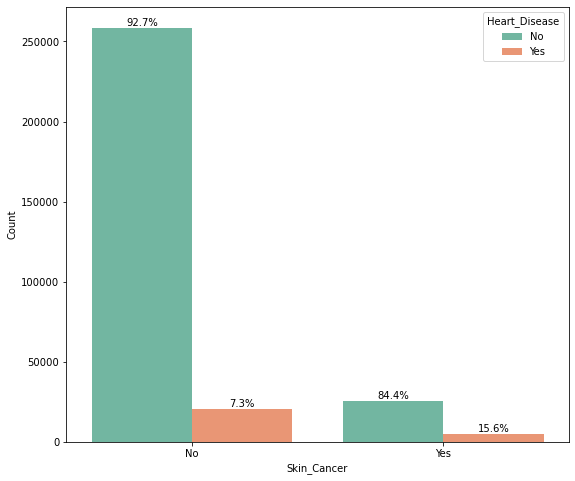

Smoking_History vs. Heart_Disease


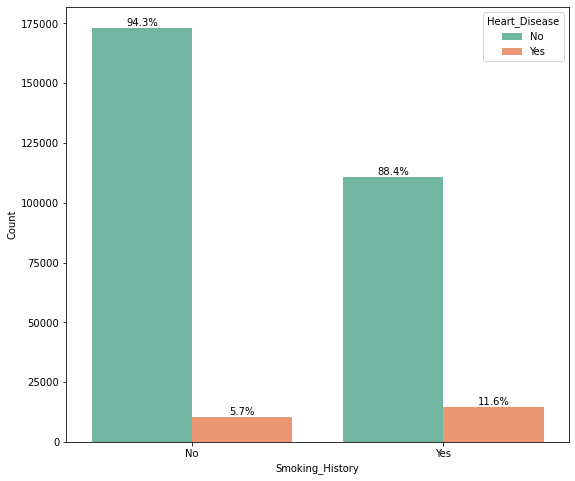

In [17]:
for i in categorical:
        if i == target:
            continue

        if data[i].nunique() > 15:
            print(f'column {i} has many unique values n = {data[i].nunique()} and will not be plotted')
            print('=======================================================')
            continue

        if i in data.columns:
            print(f'{i} vs. {target}')
            eda_bivariate_categorical(data,i,target)
            print('=======================================================')

In [18]:
data.select_dtypes(include=['object']).nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

In [19]:
data.Diabetes.unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

General_Health       has an order.\
Age_Category        has an order.\
Checkup              has an order\
Diabetes            has an order. During pregnancy -> No, pre-diabets -> average\
Others gonna be 0 or 1.

In [20]:
data['Exercise'].replace(['No', 'Yes'], [0, 1], inplace=True);
data['Skin_Cancer'].replace(['No', 'Yes'], [0, 1], inplace=True);
data['Other_Cancer'].replace(['No', 'Yes'], [0, 1], inplace=True);
data['Depression'].replace(['No', 'Yes'], [0, 1], inplace=True);
data['Arthritis'].replace(['No', 'Yes'], [0, 1], inplace=True);
data['Sex'].replace(['Female', 'Male'], [0, 1], inplace=True);
data['Smoking_History'].replace(['No', 'Yes'], [0, 1], inplace=True);
data['Diabetes'].replace(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], [0, 2, 1, 0], inplace=True);


In [21]:
data.General_Health.unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [22]:
data.Age_Category.unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [23]:
data['General_Health'].replace(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], [ int(1), int(2), int(3), int(4), int(5)], inplace=True);

In [24]:
data['Age_Category'].replace(['80+', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29',
       '18-24'], [ int(13),int(12),int(11),int(10),int(9),int(8),int(7),int(6),int(5),int(4),int(3),int(2),int(1)], inplace=True);

In [25]:
data = pd.get_dummies(data, columns = ['Checkup']) 

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   General_Health                   308854 non-null  int64  
 1   Exercise                         308854 non-null  int64  
 2   Heart_Disease                    308854 non-null  object 
 3   Skin_Cancer                      308854 non-null  int64  
 4   Other_Cancer                     308854 non-null  int64  
 5   Depression                       308854 non-null  int64  
 6   Diabetes                         308854 non-null  int64  
 7   Arthritis                        308854 non-null  int64  
 8   Sex                              308854 non-null  int64  
 9   Age_Category                     308854 non-null  int64  
 10  Height_(cm)                      308854 non-null  float64
 11  Weight_(kg)                      308854 non-null  float64
 12  BM

In [27]:
display(data)

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,...,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,1,0,No,0,0,0,0,1,0,11,...,1,0.0,30.0,16.0,12.0,0,0,1,0,0
1,2,0,Yes,0,0,0,2,0,0,11,...,0,0.0,30.0,0.0,4.0,0,0,0,0,1
2,2,1,No,0,0,0,2,0,0,9,...,0,4.0,12.0,3.0,16.0,0,0,0,0,1
3,1,1,Yes,0,0,0,2,0,1,12,...,0,0.0,30.0,30.0,8.0,0,0,0,0,1
4,3,0,No,0,0,0,0,0,1,13,...,1,0.0,8.0,4.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,2,1,No,0,0,0,0,0,1,2,...,0,4.0,30.0,8.0,0.0,0,0,0,0,1
308850,4,1,No,0,0,0,2,0,1,10,...,0,8.0,15.0,60.0,4.0,0,0,0,1,0
308851,2,1,No,0,0,1,0,0,0,3,...,1,4.0,40.0,8.0,4.0,1,0,0,0,0
308852,2,1,No,0,0,0,0,0,1,10,...,0,3.0,30.0,12.0,0.0,0,0,0,0,1


In [28]:
numerical = data.select_dtypes(include=['float64', 'int64']).columns.sort_values()
categorical = data.select_dtypes(include=['object']).columns.sort_values()

print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 1 Categorical variables
There are 17 Numerical variables


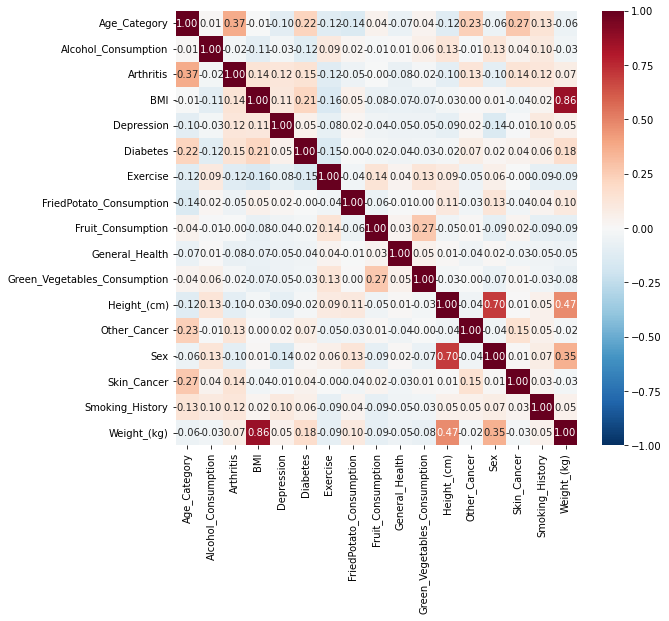

In [29]:
## Plotting the correlation matrix
correlation_matrix = data[numerical].corr()
plt.figure(figsize=(9,8))

## use mask to cover the upper diagonal in the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix,
            cmap='RdBu_r',
            # cmap='RdYlGn',
            annot=True,
            # Masking the diagonal
            # mask=mask,
            fmt='.2f',
            vmin=-1, vmax=1)

## Saving the figure
# plt.savefig("latex2.pdf")

plt.show()

In [30]:
data['Heart_Disease'] = data['Heart_Disease'].map({'No':0,'Yes':1})
print('')
print(data['Heart_Disease'].value_counts())


0    283883
1     24971
Name: Heart_Disease, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data, test_size=0.2,random_state=22,stratify=data['Heart_Disease'])

print(train.shape)
print(test.shape)

(247083, 23)
(61771, 23)


In [32]:
yes = train['Heart_Disease'].value_counts()[0]/len(train['Heart_Disease'])*100
no = train['Heart_Disease'].value_counts()[1]/len(train['Heart_Disease'])*100
print('Train Set')
print(f'ratio of people with heart disease to total is {yes}')
print(f'ratio of people that dont have heart disease to total is {no}')
print('')

yes = test['Heart_Disease'].value_counts()[0]/len(test['Heart_Disease'])*100
no = test['Heart_Disease'].value_counts()[1]/len(test['Heart_Disease'])*100
print('Test Set')
print(f'ratio of people with heart disease to total is {yes}')
print(f'ratio of people that dont have heart disease to total is {no}')

Train Set
ratio of people with heart disease to total is 91.91486261701533
ratio of people that dont have heart disease to total is 8.085137382984666

Test Set
ratio of people with heart disease to total is 91.91530005989866
ratio of people that dont have heart disease to total is 8.084699940101341


n_samples = 308854
n_features = 23
centers = 4
cluster_std = 1.0

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=42)

plt.figure(figsize=(7, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Visualization of Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

display(X)
display(y)

In [40]:
X_test = test.drop("Heart_Disease", axis=1)
y_test = test["Heart_Disease"].copy()
X_train = train.drop("Heart_Disease", axis=1)
y_train = train["Heart_Disease"].copy()

In [42]:
from imblearn.over_sampling import SMOTE

X_train = np.array(X_train)
y_train = np.array(y_train)

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

array([[5.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [2.        , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [5.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [4.        , 0.13225246, 0.13225246, ..., 0.        , 0.        ,
        1.        ],
       [2.41195241, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [4.        , 0.39210031, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [44]:
#log_reg_model = LogisticRegression()
rand_f_model = RandomForestClassifier()

#log_reg_model.fit(X_train, y_train)
rand_f_model.fit(X_resampled, y_resampled)

#log_reg_pred = log_reg_model.predict(X_test)
rand_f_pred = rand_f_model.predict(X_test)

C:\Users\MeltemArman\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [45]:
def plot_classification_report(report, title):
    lines = report.split('\n')[2:-5]
    classes = []
    precision = []
    recall = []
    f1_score = []
    support = []
    for line in lines:
        row_data = line.split()
        classes.append(row_data[0])
        precision.append(float(row_data[1]))
        recall.append(float(row_data[2]))
        f1_score.append(float(row_data[3]))
        support.append(int(row_data[4]))



In [46]:
rand_f_d_report = classification_report(y_test, rand_f_pred)

In [176]:
print(rand_f_d_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56777
           1       0.49      0.04      0.07      4994

    accuracy                           0.92     61771
   macro avg       0.71      0.52      0.52     61771
weighted avg       0.89      0.92      0.89     61771



In [177]:
model = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1),
    eval_metric='logloss', 
    use_label_encoder=False
)

model.fit(X_train, y_train)

xgb_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

In [178]:
xgb_report = classification_report(y_test, xgb_pred)

In [179]:
print(xgb_report)

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     56777
           1       0.21      0.77      0.33      4994

    accuracy                           0.75     61771
   macro avg       0.59      0.76      0.59     61771
weighted avg       0.91      0.75      0.80     61771

